### Gaussian Naive Bayes Classifier
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

$$
P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)
$$

The parameters $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

```python
class sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
```

#### 1 Generate Gaussian blobs

[(-15, 5), (-8, 8)]

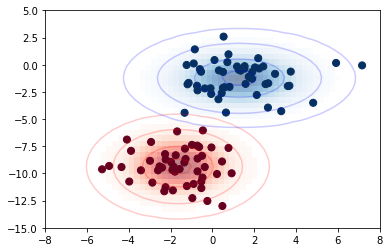

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)


The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

#### 2 GaussianNB
This procedure is implemented in Scikit-Learn's sklearn.naive_bayes.GaussianNB estimator:

In [2]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

Now let's generate some new data and predict the label:

In [3]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = clf.predict(Xnew)

Then we can plot this new data to get an idea of where the decision boundary is:

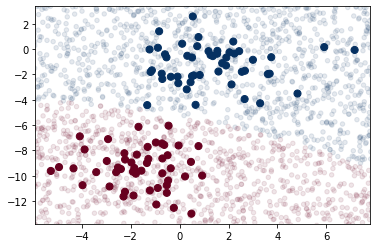

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

### Example: Classify iris data

#### 1. Load real world dataset
The [sklearn.datasets](https://scikit-learn.org/stable/datasets.html#datasets) package embeds some small toy datasets. This package also features helpers to fetch larger datasets commonly used by the machine learning community to benchmark algorithms on data that comes from the ‘real world’.

In [3]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print("X1:", X[0])
print("y1:", y[0])

X1: [5.1 3.5 1.4 0.2]
y1: 0


#### 2. Split dataset into random train and test subsets

```python
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```

Parameters:
- *arrays: sequence of indexables with same length / shape[0]  
Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

- test_size: float or int, default=None  
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

- train_size: float or int, default=None  
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

- random_state: int, RandomState instance or None, default=None
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

- shuffle: bool, default=True
Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

Returns:  
X_train, X_test, y_train, y_test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print("The number of train subset:", X_train.shape[0])
print("The number of test subset:", X_test.shape[0])
print(f"X_train:{X_train}\nX_test:{X_test}\ny_train:{y_train}\ny_test:{y_test}")

The number of train subset: 75
The number of test subset: 75
X_train:[[4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.7 2.1]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [4.9 3.  1.4 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.5 2.3 4.  1.3]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [5.1 3.5 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [5.7 2.8 4.5 1.3]
 [6.6 3.  4.4 1.4]
 [5.  3.2 1.2 0.2]
 [5.1 3.3 1.7 0.5]
 [6.4 2.9 4.3 1.3]
 [5.4 3.4 1.5 0.4]
 [7.7 2.6 6.9 2.3]
 [4.9 2.4 3.3 1. ]
 [7.9 3.8 6.4 2. ]
 [6.7 3.1 4.4 1.4]
 [5.2 4.1 1.5 0.1]
 [6.  3.  4.8 1.8]
 [5.8 4.  1.2 0.2]
 [7.7 2.8 6.7 2. ]
 [5.1 3.8 1.5 0.3]
 [4.7 3.2 1.6 0.2]


#### 3. GaussianNB
Please use a Gaussian Naive Bayes Classifier to classify the iris dataset and evaluate the accuracy of prediction in the test set.

```python
sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
```

Parameters:
- y_true: 1d array-like, or label indicator array / sparse matrix  
Ground truth (correct) labels.

- y_pred: 1d array-like, or label indicator array / sparse matrix
Predicted labels, as returned by a classifier.

- normalize: bool, default=True  
If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.

Returns:
- score: float  
If normalize == True, return the fraction of correctly classified samples (float), else returns the number of correctly classified samples (int).  
The best performance is 1 with normalize == True and the number of samples with normalize == False.

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy is: ', accuracy_score(y_test,y_pred))

Accuracy is:  0.9466666666666667
